In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("C:/Users/ankit maurya/Downloads/purchase_behaviour.CSV")

In [3]:
df.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
df1=pd.read_csv("C:/Users/ankit maurya/Downloads/transaction_data.CSV")
df1.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
df1.TXN_ID.isnull().sum()

0

In [15]:
df1.DATE.isnull().sum()

0

In [17]:
df1.LYLTY_CARD_NBR.isnull().sum()

0

In [18]:
df1.PROD_NAME.isnull().sum()

0

In [19]:
df1.PROD_QTY.isnull().sum()

0

In [20]:
df1.TOT_SALES.isnull().sum()

0

In [5]:
merged_df = pd.merge(df, df1, on="LYLTY_CARD_NBR", how="inner")  # Use "inner" for matching records only


merged_df.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [6]:
top_products = merged_df.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(3)
print(top_products)

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


In [24]:
loyal_customers = merged_df.groupby("LYLTY_CARD_NBR").size().reset_index(name="Purchase_Count")

In [29]:
merged_df.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [8]:
loyal_customers = merged_df.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index()

In [9]:
loyal_customers.columns = ["LYLTY_CARD_NBR", "Total_Transactions"]

In [10]:
loyal_customers = loyal_customers.merge(df[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']], on="LYLTY_CARD_NBR", how="left").drop_duplicates()

In [11]:
top_loyal_segments = loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Total_Transactions"].sum().sort_values(ascending=False)

In [12]:
print(top_loyal_segments.head(5))

LIFESTAGE              PREMIUM_CUSTOMER
OLDER FAMILIES         Budget              23160
RETIREES               Mainstream          21466
YOUNG SINGLES/COUPLES  Mainstream          20854
YOUNG FAMILIES         Budget              19122
OLDER SINGLES/COUPLES  Budget              18407
Name: Total_Transactions, dtype: int64


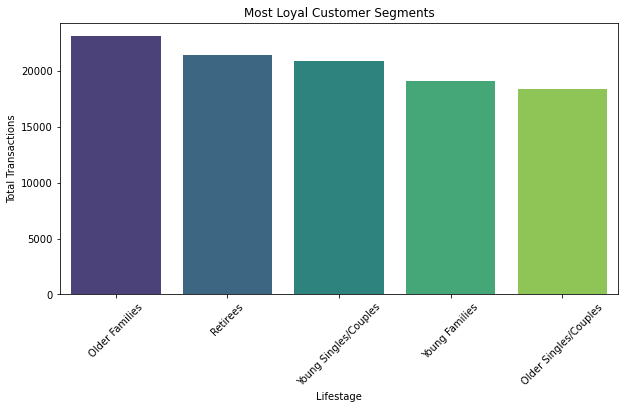

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
lifestages = ["Older Families", "Retirees", "Young Singles/Couples", "Young Families", "Older Singles/Couples"]
transactions = [23160, 21466, 20854, 19122, 18407]

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=lifestages, y=transactions, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Lifestage")
plt.ylabel("Total Transactions")
plt.title("Most Loyal Customer Segments")
plt.show()

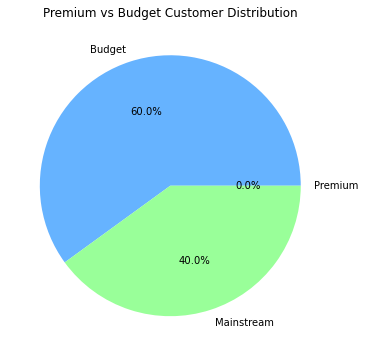

In [14]:
import matplotlib.pyplot as plt

# Sample data
labels = ["Budget", "Mainstream", "Premium"]
values = [3, 2, 0]  # Based on counts from your dataset

# Plot
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=["#66b3ff", "#99ff99", "#ffcc99"])
plt.title("Premium vs Budget Customer Distribution")
plt.show()

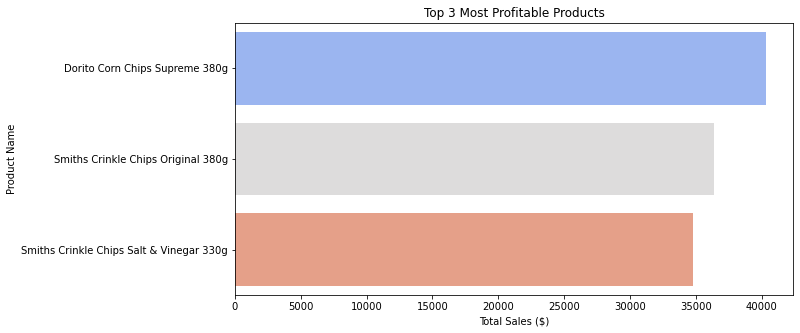

In [15]:
products = ["Dorito Corn Chips Supreme 380g", "Smiths Crinkle Chips Original 380g", "Smiths Crinkle Chips Salt & Vinegar 330g"]
sales = [40352, 36367.6, 34804.2]

plt.figure(figsize=(10,5))
sns.barplot(x=sales, y=products, palette="coolwarm")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

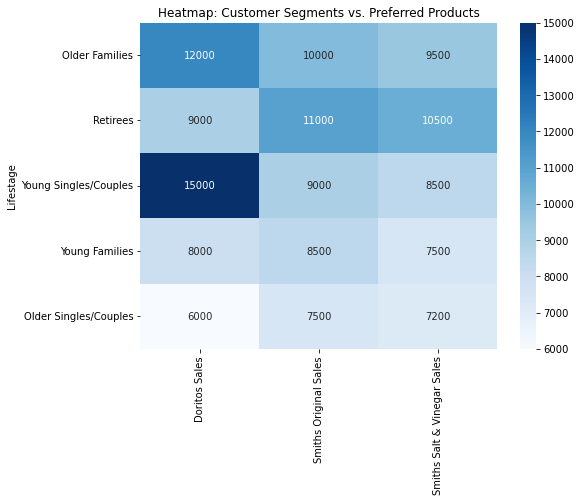

In [16]:
import seaborn as sns

# Sample DataFrame
data = pd.DataFrame({
    "Lifestage": ["Older Families", "Retirees", "Young Singles/Couples", "Young Families", "Older Singles/Couples"],
    "Doritos Sales": [12000, 9000, 15000, 8000, 6000],
    "Smiths Original Sales": [10000, 11000, 9000, 8500, 7500],
    "Smiths Salt & Vinegar Sales": [9500, 10500, 8500, 7500, 7200]
})

plt.figure(figsize=(8,6))
sns.heatmap(data.set_index("Lifestage"), cmap="Blues", annot=True, fmt=".0f")
plt.title("Heatmap: Customer Segments vs. Preferred Products")
plt.show()